In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
%matplotlib widget

## Importing all the Raman pressure files

In [2]:
pathL = '../data/raw/Loading/Raman/'
pathUL = '../data/raw/Unloading/Raman/'

In [3]:
#FIles for 20X magnification Raman spectroscopy
file_20X_L = ['39_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_89p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_1', 
            '49_Re0p10Mo0p90B2_OmniDAC_Run1_71p0bar_130p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4',
            '50_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_5',
            '51_Re0p10Mo0p90B2_OmniDAC_Run1_96p0bar_150p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4'] #Files for loading pressure

file_20X_UL=['101_Re0p10Mo0p90B2_OmniDAC_Run1_33p0bar_129p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_1',
             '103_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_1',
            '105_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_2',
            '106_Re0p10Mo0p90B2_OmniDAC_Run1_8p0bar_50p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_20x_900x1_4']#files for unloading pressure


In [4]:
#FIles for 20X magnification Raman spectroscopy
file_40X_L = ['40_Re0p10Mo0p90B2_OmniDAC_Run1_65p0bar_89p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
             '49_Re0p10Mo0p90B2_OmniDAC_Run1_71p0bar_130p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
              '50_Re0p10Mo0p90B2_OmniDAC_Run1_74p0bar_140p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
              '51_Re0p10Mo0p90B2_OmniDAC_Run1_96p0bar_150p0GPa_loading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1']

file_40X_UL = ['101_Re0p10Mo0p90B2_OmniDAC_Run1_33p0bar_129p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
               '103_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
               '105_Re0p10Mo0p90B2_OmniDAC_Run1_17p0bar_100p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1',
               '106_Re0p10Mo0p90B2_OmniDAC_Run1_8p0bar_50p0GPa_unloading_292p0K_laseron_V12I34_0p3mA_Vmode_1_Pdm_40x_900x1_1']

In [5]:
#Dict for 20X files
dict_20X = {}
for file in file_20X_L:
    file_num = int(re.split('_', file)[0])
    dict_20X[file_num] = pd.read_csv(pathL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])  #naming wavelength column 'RS' to avoid renaming later
for file in file_20X_UL:
    file_num = int(re.split('_', file)[0])
    dict_20X[file_num] = pd.read_csv(pathUL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
    
#Dict for 40 X files

dict_40X = {}
for file in file_40X_L:
    file_num = int(re.split('_', file)[0])
    dict_40X[file_num] = pd.read_csv(pathL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])  #
for file in file_40X_UL:
    file_num = int(re.split('_', file)[0])
    dict_40X[file_num] = pd.read_csv(pathUL+file+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
        

In [6]:
#Background for 20X and 40X during loading and unloading pressure
dict_20X_bgd = {}
for file in file_20X_L:
    file_num = int(re.split('_', file)[0])
    dict_20X_bgd[file_num] = pd.read_csv(pathL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
for file in file_20X_UL:
    file_num = int(re.split('_', file)[0])
    dict_20X_bgd[file_num] = pd.read_csv(pathUL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
    
dict_40X_bgd = {}
for file in file_40X_L:
    file_num = int(re.split('_', file)[0])
    dict_40X_bgd[file_num] = pd.read_csv(pathL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
for file in file_40X_UL:
    file_num = int(re.split('_', file)[0])
    dict_40X_bgd[file_num] = pd.read_csv(pathUL+file+'_bgd'+'.csv', delimiter = '\t', names = ['RS','Intensity'], skiprows = [0])
        

##  Subtracting Background from Data

In [7]:
dict_RS_20X = {}
for f in dict_20X.keys():
    X = (10**7)*((1/638.3)-(1/dict_20X[f].RS)) #changing wavelength to raman shift
    Y= (dict_20X[f].Intensity - dict_20X_bgd[f].Intensity).rolling(5, center =True).mean()
    df= pd.DataFrame([X,Y]).T.dropna().reset_index()
    dict_RS_20X[f] = df 
    
    
dict_RS_40X = {}
for f in dict_40X.keys():
    X = (10**7)*((1/638.3)-(1/dict_40X[f].RS)) #changing wavelength to raman shift
    Y= (dict_40X[f].Intensity - dict_40X_bgd[f].Intensity).rolling(5, center =True).mean()
    df= pd.DataFrame([X,Y]).T.dropna().reset_index()
    dict_RS_40X[f] = df 
    


Text(0.5, 0, 'Raman Shift (cm$^{-1}$)')

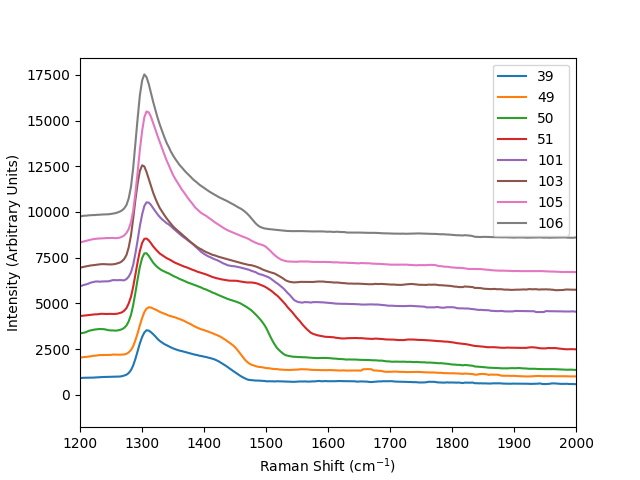

In [8]:
#Plotting 20X Ramana in graph

offset = [-100,-100,-1000, 200, 2800, 4000, 5100, 7100]
i=0
fig,ax = plt.subplots()
for f in dict_RS_20X.keys():
    ax.plot(dict_RS_20X[f].RS,dict_RS_20X[f].Intensity+offset[i],label = f)
    i= i+1
ax.legend()
ax.set_xlim(1200,2000)
ax.set_ylabel("Intensity (Arbitrary Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)")

In [9]:
plt.close('all')

Text(0.5, 0, 'Raman Shift (cm$^{-1}$)')

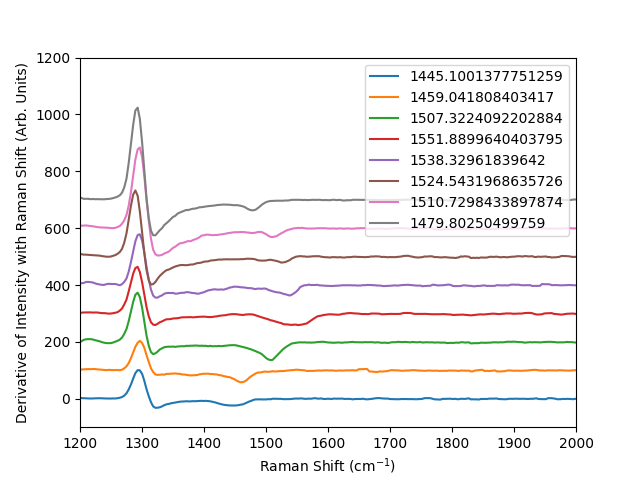

In [9]:
#Plotting derivative of 20X Raman

offset = 0
fig,ax = plt.subplots()
for f in dict_RS_20X.keys():
    Derivative = (dict_RS_20X[f].Intensity.diff()/dict_RS_20X[f].RS.diff()).rolling(5, center =True).mean()
    idx = Derivative[60:150].idxmin()
    shift = dict_RS_20X[f].RS[idx]
    ax.plot(dict_RS_20X[f].RS,Derivative+offset,label = shift)
    offset = offset+100
ax.legend(loc="upper right")
ax.set_xlim(1200,2000)
ax.set_ylim(-100,1200)
ax.set_ylabel("Derivative of Intensity with Raman Shift (Arb. Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)")

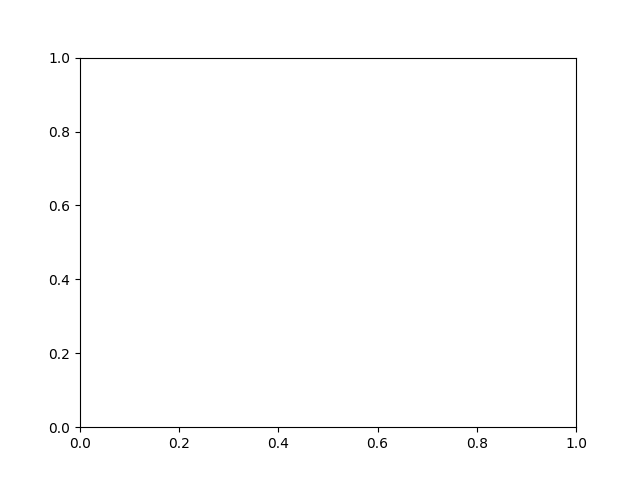

In [32]:
offset = 0
fig,ax = plt.subplots()
for f in dict_RS_20X.keys():
    Der= []
    Der.append((dict_RS_20X[f].Intensity.diff()/dict_RS_20X[f].RS.diff()).rolling(5, center =True).mean())
    Der = pd.DataFrame(Der)
    DD = Der.diff()

# ax.legend(loc="upper right")
# ax.set_xlim(1200,2000)
# ax.set_ylim(-100,1200)
# ax.set_ylabel("Derivative of Intensity with Raman Shift (Arb. Units)")
# ax.set_xlabel("Raman Shift (cm$^{-1}$)")

In [34]:
Der

,0,1,2,3,4,5,6,7,8,9,...,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039
0,NaN,NaN,NaN,6.199536,3.029855,3.458098,3.318761,2.013907,2.668047,1.91081,...,-72.47414,-169.086689,-211.359178,-166.433935,-137.142658,-107.405037,-77.325638,-48.755632,NaN,NaN


#### Plotting 40X raman

Text(0.5, 1.0, 'Raman at 40X magnification')

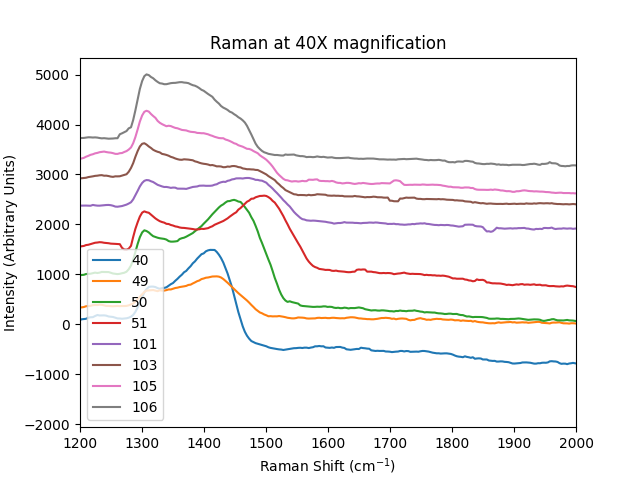

In [59]:
#Plotting 40X Ramana in graph

offset = [-1800,-300,-1000, -100,1400,1800, 2100, 2600]
i=0
fig,ax = plt.subplots()
for f in dict_RS_40X.keys():
    ax.plot(dict_RS_40X[f].RS,dict_RS_40X[f].Intensity+offset[i],label = f)
    i= i+1
ax.legend()
ax.set_xlim(1200,2000)
ax.set_ylabel("Intensity (Arbitrary Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)")
ax.set_title('Raman at 40X magnification')

In [60]:
plt.close('all')

Text(0.5, 0, 'Raman Shift (cm$^{-1}$)')

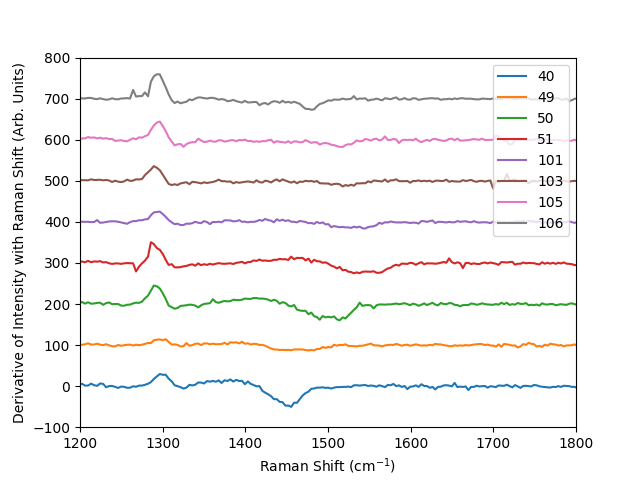

In [61]:
#Plotting derivative of 40X Raman

offset = 0
fig,ax = plt.subplots()
for f in dict_RS_40X.keys():
    Derivative = dict_RS_40X[f].Intensity.diff()/dict_RS_40X[f].RS.diff()
    ax.plot(dict_RS_40X[f].RS,Derivative+offset,label = f)
    offset = offset+100
ax.legend(loc="upper right")
ax.set_xlim(1200,1800)
ax.set_ylim(-100,800)
ax.set_ylabel("Derivative of Intensity with Raman Shift (Arb. Units)")
ax.set_xlabel("Raman Shift (cm$^{-1}$)")

In [93]:
plt.close('all')